### This random forest model reads data from clean_data_final, and writes to sklearn_models. Here we are using rain as a boolean feature. 

In [48]:
# general 
import datetime
import os

# data analysis and wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

import seaborn as sns


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pickling
import pickle

%matplotlib inline

In [10]:
lines = []
files = os.listdir("bus_data/clean_data_final/")
for file in files:
    lines.append(file.strip(".csv"))

In [3]:
def get_data(line):
    
#     Read in the data from a csv file using Pandas
    df = pd.read_csv("bus_data/clean_data_final/" + line + ".csv", low_memory=False)
    rows = df.shape[0]
    
    # Setting up descriptive & target features
    features = ["Day", "Hour", "JourneyPatternID", "Rain", "StopID",]# "JourneyPatternID"] #'LineID', 'JourneyPatternID']

    # converting to categories
    for feature in features:
        df[feature] = df[feature].astype('category')

    # Priming features for the model
    X = pd.concat([df[features]], axis=1)
    y = df.Runtime
    
    return X,y,rows

## Train Test Split

In [52]:
mydf = pd.DataFrame(columns=["line","r","mae","mse","med","accuracy","rows"])

for line in lines:
    
    X,y,rows = get_data(line)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # Fit model on training dataset
    rfc.fit(X_train, y_train)

    rfc_predictions = rfc.predict(X_test)

    r = metrics.r2_score(y_test, rfc_predictions)
    mae = metrics.mean_absolute_error(y_test, rfc_predictions)
    mse = metrics.mean_squared_error(y_test, rfc_predictions)
    med = metrics.median_absolute_error(y_test, rfc_predictions)
    
    # importances = rfc.feature_importances_
    # std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
    #              axis=0)
    # indices = np.argsort(importances)[::-1]

    # # Print the feature ranking
    # print(importances)
    
    true_v_pred = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': rfc_predictions}) #, 'Hour': hour, 'Day': day})
#     sample = true_v_pred.sample(100).reset_index(drop=True)
#     sample.plot()
#     savefig('foo.png', bbox_inches='tight')
    
    correct = 0
    window = 600

    for index, row in true_v_pred.iterrows():
        tolerance = range(int(row['Predicted Value']) - window, int(row['Predicted Value']) + window)
        if (row['Actual Value'] >= tolerance[0]) and (row['Actual Value'] <= tolerance[-1]):
            correct += 1

    accuracy = correct / len(true_v_pred)
    
    # Add a row to df  
    row = [line,r,mae,mse,med,accuracy,rows]  
    mydf.loc[len(mydf)] = row
    
mydf.to_csv("evaluation_stats.csv")

# Single Run

In [45]:
mydf = pd.DataFrame(columns=["line","r","mae","mse","med","three_minutes"])

line = lines[0]
    
X,y = get_data(line)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Fit model on training dataset
rfc.fit(X_train, y_train)

rfc_predictions = rfc.predict(X_test)

r = metrics.r2_score(y_test, rfc_predictions)
mae = metrics.mean_absolute_error(y_test, rfc_predictions)
mse = metrics.mean_squared_error(y_test, rfc_predictions)
med = metrics.median_absolute_error(y_test, rfc_predictions)

# importances = rfc.feature_importances_
# std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
#              axis=0)
# indices = np.argsort(importances)[::-1]

# # Print the feature ranking
# print(importances)

true_v_pred = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': rfc_predictions}) #, 'Hour': hour, 'Day': day})
sample = true_v_pred.sample(100).reset_index(drop=True)
# sample.plot().savefig('foo.png', bbox_inches='tight')

correct = 0
window = 600

for index, row in true_v_pred.iterrows():
    tolerance = range(int(row['Predicted Value']) - window, int(row['Predicted Value']) + window)
    if (row['Actual Value'] >= tolerance[0]) and (row['Actual Value'] <= tolerance[-1]):
        correct += 1

accuracy = correct / len(true_v_pred)
print("accuracy", accuracy)

print("line", line)
print("mae", mae)
print("mse", mse)
print("med", med)

# Add a row to df  
row = [line,r,mae,mse,med,accuracy]  
mydf.loc[len(mydf)] = row


accuracy 0.974009373668513
line 1
mae 182.068849323
mse 60718.415128
med 141.811834846


In [53]:
mydf

,line,r,mae,mse,med,accuracy,rows
0,1,0.928362,184.040265,62769.469937,141.934922,0.973773,70409.0
1,102,0.704432,191.889737,291094.294881,135.033548,0.976070,42762.0
2,104,0.926509,138.235672,38534.941014,98.026970,0.989292,7158.0
3,11,0.909316,275.107778,153463.938315,197.087605,0.897194,95389.0
4,111,0.584609,183.200558,118947.190034,111.128643,0.953984,2970.0
5,114,0.794571,214.155623,95382.475147,151.604071,0.938782,10888.0
6,116,0.931602,240.674475,122519.103456,176.873333,0.944444,1198.0
7,118,0.878996,306.005290,163503.028066,229.380083,0.890244,817.0
8,120,0.815650,138.439757,47366.071740,99.095175,0.987099,46504.0
9,122,0.910745,225.698734,119595.536100,167.619336,0.943040,138457.0


In [58]:
mydf.describe()

,r,mae,mse,med,accuracy,rows
count,117.000000,117.000000,1.170000e+02,117.000000,117.000000,117.000000
mean,0.848939,218.114909,1.974465e+05,155.029744,0.943734,48632.495726
std,0.180823,50.475421,3.266797e+05,34.522445,0.037694,63452.376178
min,-0.256493,101.423322,1.990654e+04,72.851310,0.710216,444.000000
25%,0.871585,188.229213,7.058971e+04,134.985476,0.923885,5358.000000
50%,0.910745,214.155623,1.009279e+05,154.711416,0.948963,25354.000000
75%,0.936079,253.727289,1.364084e+05,176.873333,0.968635,63178.000000
max,0.958987,444.190050,2.207737e+06,319.991469,1.000000,280822.000000


In [62]:
a = [x for x in range(118)]

In [34]:
stats = pd.read_csv("evaluation_stats.csv", index_col=0)

In [35]:
pd.set_option('precision',4)
stats

,line,r,mae,mse,med,accuracy,rows
0,1,0.928,184.040,62769.470,141.935,0.974,70409.000
1,102,0.704,191.890,291094.295,135.034,0.976,42762.000
2,104,0.927,138.236,38534.941,98.027,0.989,7158.000
3,11,0.909,275.108,153463.938,197.088,0.897,95389.000
4,111,0.585,183.201,118947.190,111.129,0.954,2970.000
5,114,0.795,214.156,95382.475,151.604,0.939,10888.000
6,116,0.932,240.674,122519.103,176.873,0.944,1198.000
7,118,0.879,306.005,163503.028,229.380,0.890,817.000
8,120,0.816,138.440,47366.072,99.095,0.987,46504.000
9,122,0.911,225.699,119595.536,167.619,0.943,138457.000


In [41]:
stats.line = stats.line.astype('category')
stats.dtypes


line        category
r            float64
mae          float64
mse          float64
med          float64
accuracy     float64
rows         float64
dtype: object

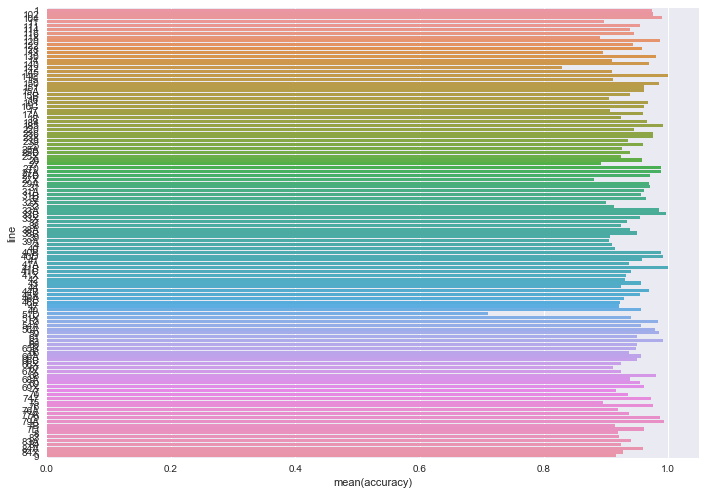

In [62]:
# plt.bar(stats.line,stats.r)
# plt.show()

# Plot bar charts for all categorical features and save them in a single PDF file
pp = PdfPages('3minutes.pdf')

# for column in categorical_columns:
#     f = df[column].value_counts().plot(kind='bar', title=column, figsize=(12,5))
#     pp.savefig(f.get_figure())
#     plt.show()


# f = stats[column].value_counts().plot(kind='bar', title=column, figsize=(12,5))

a4_dims = (11.7, 8.27)
# df = mylib.load_data()
fig, ax = plt.subplots(figsize=a4_dims)
# sns.voilinplot(ax=ax, data=df, **violin_options)

f = sns.barplot(x=stats.accuracy, y=stats.line, data=stats);

pp.savefig(f.get_figure())
pp.close()


In [ ]:
# plt.bar(mydf.line, mydf.r, align='center', alpha=0.5)


busses = a
y = mydf.r

LABELS = lines

plt.bar(busses, y, align='center')
plt.xticks(busses, LABELS)
plt.show()


# import pylab as plt

# DayOfWeekOfCall = [1,2,3]
# DispatchesOnThisWeekday = [77, 32, 42]

# LABELS = ["Monday", "Tuesday", "Wednesday"]

# plt.bar(DayOfWeekOfCall, DispatchesOnThisWeekday, align='center')
# plt.xticks(DayOfWeekOfCall, LABELS)
# plt.show()

In [36]:
pd.set_option('precision',4)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
description = stats.describe()

In [37]:
description

,r,mae,mse,med,accuracy,rows
count,117.000,117.000,117.000,117.000,117.000,117.000
mean,0.849,218.115,197446.503,155.030,0.944,48632.496
std,0.181,50.475,326679.651,34.522,0.038,63452.376
min,-0.256,101.423,19906.544,72.851,0.710,444.000
25%,0.872,188.229,70589.707,134.985,0.924,5358.000
50%,0.911,214.156,100927.888,154.711,0.949,25354.000
75%,0.936,253.727,136408.353,176.873,0.969,63178.000
max,0.959,444.190,2207737.195,319.991,1.000,280822.000


In [32]:
print(description.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &       r &     mae &         mse &     med &  accuracy &       rows \\
\midrule
count & 117.000 & 117.000 &     117.000 & 117.000 &   117.000 &    117.000 \\
mean  &   0.849 & 218.115 &  197446.503 & 155.030 &     0.944 &  48632.496 \\
std   &   0.181 &  50.475 &  326679.651 &  34.522 &     0.038 &  63452.376 \\
min   &  -0.256 & 101.423 &   19906.544 &  72.851 &     0.710 &    444.000 \\
25\%   &   0.872 & 188.229 &   70589.707 & 134.985 &     0.924 &   5358.000 \\
50\%   &   0.911 & 214.156 &  100927.888 & 154.711 &     0.949 &  25354.000 \\
75\%   &   0.936 & 253.727 &  136408.353 & 176.873 &     0.969 &  63178.000 \\
max   &   0.959 & 444.190 & 2207737.195 & 319.991 &     1.000 & 280822.000 \\
\bottomrule
\end{tabular}

